# Importing the data

In [ ]:
!pip install gdown
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
file_id = "1Al5-ugZv7fSev2t9tUB09Z9caZMKvftd"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "visa_data.csv"
gdown.download(download_url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Al5-ugZv7fSev2t9tUB09Z9caZMKvftd
From (redirected): https://drive.google.com/uc?id=1Al5-ugZv7fSev2t9tUB09Z9caZMKvftd&confirm=t&uuid=eca9904c-d3ff-43f0-8856-2f00bc6899b4
To: /content/visa_data.csv
100%|██████████| 354M/354M [00:03<00:00, 117MB/s]


'visa_data.csv'

Load the dataset and checking the shapes

In [ ]:
visa_data = pd.read_csv('visa_data.csv')
rows, columns = visa_data.shape
print(f'visa dataset contains {rows} rows and {columns} columns')
visa_data.head(5)

visa dataset contains 1296675 rows and 24 columns


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


# Data Cleaning

In [ ]:
# Storing the loaded datasets into a dictionary for easy access
dataframes = {'visa_data': visa_data}

Checking for duplicate values

In [ ]:
datasets = [ 'visa_data']
for data in datasets:
    duplicates = dataframes[data].duplicated().sum()
    print(f'{data} contains {duplicates} duplicate values')

visa_data contains 0 duplicate values


**There are no duplicate rows in the datasets**

Checking for null values

In [ ]:
for data in datasets:
    nulls = dataframes[data].isna().sum()
    print(f'------------------{data}------------------')
    print(f'{nulls}')
    print()

------------------visa_data------------------
Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64



In visa_data, merch_zipcode column has 195973 null values.
As dropping these rows will reduce your data volume we will not remove these rows.



**In visa_data, column street is Too granular, rarely helpful at individual address level. Also ID column is just a row index, adds no analytical value. This will save memory as well.**

In [ ]:
visa_data.drop(['street','Unnamed: 0'], axis= 1, inplace= True)
visa_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [ ]:
for data in datasets:
    datatypes = dataframes[data].dtypes
    print(f'------------------{data}------------------')
    print(f'{datatypes}')
    print()

------------------visa_data------------------
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object



**The trans_date_trans_timehave,dob datetime columns which are of the object datatype. Changing the datatype to timestamp format**

In [ ]:
visa_data['trans_date_trans_time'] =  pd.to_datetime(visa_data['trans_date_trans_time'], format= "%Y-%m-%d %H:%M:%S")
visa_data['dob'] =  pd.to_datetime(visa_data['dob'], format= "%Y-%m-%d")

In [ ]:
print(visa_data['trans_date_trans_time'].dtype)
print(visa_data['dob'].dtype)

datetime64[ns]
datetime64[ns]


## Outlier Flag & City Size Segmentation

we enhance the dataset by:


*  Flagging outliers in the amt (transaction amount) column using the IQR
   method. This allows us to study high-value anomalies without removing them.
     
*  Segmenting cities into four population-based categories (Rural, Town, Urban, Metro) using the city_pop feature. This will support geographic trend analysis in the EDA phase.



In [ ]:
def add_outlier_flag(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    flag_col = f'{column}_outlier'
    df[flag_col] = df[column].apply(lambda x: 1 if x < lower_bound or x > upper_bound else 0)
    print(f"{flag_col} column added. Number of outliers in '{column}': {df[flag_col].sum()}")
    return df

# APPLY it again and confirm
visa_data = add_outlier_flag(visa_data, 'amt')

amt_outlier column added. Number of outliers in 'amt': 67290


In [ ]:
# Segment cities by population size
def city_size(pop):
    if pop < 1000:
        return 'Rural'
    elif pop < 20000:
        return 'Town'
    elif pop < 100000:
        return 'Urban'
    else:
        return 'Metro'

# Create city_size column
visa_data['city_size'] = visa_data['city_pop'].apply(city_size)

# Optional: review distribution
print(visa_data['city_size'].value_counts())


city_size
Town     572589
Rural    398055
Metro    178874
Urban    147157
Name: count, dtype: int64


# Data Analysis

### Customer-Level Metrics for CLV



*   Customer Lifetime Value (CLV) measures how much revenue a customer brings over their relationship with Visa.
*   It combines behavioral (frequency, recency) and monetary (spending) attributes to help segment high- vs low-value users.




### 1.Total Transactions for Top 5 Customers
->  This reflects customer engagement — more transactions usually mean higher loyalty and value.

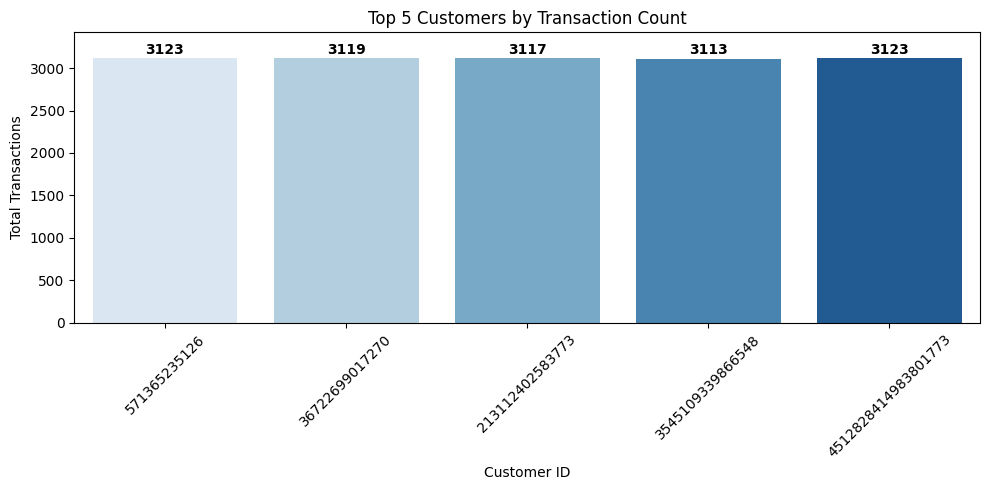

In [ ]:
# Step 1: Group by customer ID and count transactions
txn_count = visa_data.groupby('cc_num')['trans_num'].count().reset_index(name='txn_count')

# Step 2: Get top 5 customers with most transactions
top5_txn = txn_count.sort_values('txn_count', ascending=False).head(5)

# Step 3: Define a color palette with 5 shades
palette = sns.color_palette("Blues", n_colors=5)

# Step 4: Plot bar chart with hue to avoid palette warning
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top5_txn, x='cc_num', y='txn_count',
                 hue='cc_num', palette=palette, legend=False)

# Step 5: Add data labels above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 50),
                ha='center', fontsize=10, fontweight='bold')

# Step 6: Style and finalize the plot
plt.ylim(0, top5_txn['txn_count'].max() + 300)
plt.title("Top 5 Customers by Transaction Count")
plt.xlabel("Customer ID")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Total Amount Spent by top 5 Customers
Monetary value: Total money spent by top 5 customers. Direct indicator of value to Visa.

Top 5 Customers by Total Amount Spent:
[(6011367958204270, 296436.73), (4908846471916297, 290478.49), (6011438889172900, 284013.5), (36722699017270, 280008.05), (6011893664860915, 278325.97)]


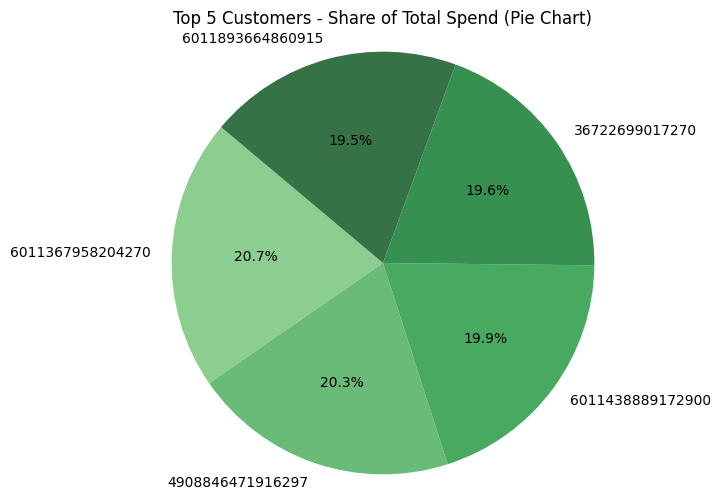

In [ ]:
# Step 1: Count transactions and total amount per customer
clv_data = visa_data.groupby('cc_num').agg(
    txn_count=('trans_num', 'count'),
    total_amt=('amt', 'sum')
).reset_index()

# Step 2: Get Top 5 customers by total spend
top5_spenders = clv_data.sort_values('total_amt', ascending=False).head(5)

# Prepare data for the pie chart - list of tuples is not the right format for pie chart, need the Series of values and the Series of labels
top5_spenders_values = top5_spenders['total_amt']
top5_spenders_labels = top5_spenders['cc_num']

print("Top 5 Customers by Total Amount Spent:")
print(list(zip(top5_spenders_labels, top5_spenders_values))) # Display in the requested format

# ----------- 2. Pie Chart -----------
plt.figure(figsize=(6, 6))
plt.pie(
    top5_spenders_values, # Use the Series of values
    labels=top5_spenders_labels, # Use the Series of labels
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Greens_d')
)
plt.title("Top 5 Customers - Share of Total Spend (Pie Chart)")
plt.axis('equal')
plt.show()

### 3. Category Spend for Top 5 Customers
Identify customers who transacted most recently (low recency_days)

[{'cc_num': 6011367958204270, 'entertainment': 19837.65, 'food_dining': 10658.68, 'gas_transport': 7941.4, 'grocery_net': 11383.8, 'grocery_pos': 59064.45, 'health_fitness': 13336.17, 'home': 19035.36, 'kids_pets': 16975.82, 'misc_net': 10507.14, 'misc_pos': 16650.829999999998, 'personal_care': 12224.07, 'shopping_net': 38182.38, 'shopping_pos': 42389.76, 'travel': 18249.22}, {'cc_num': 4908846471916297, 'entertainment': 18477.11, 'food_dining': 12384.16, 'gas_transport': 6713.06, 'grocery_net': 11941.59, 'grocery_pos': 60814.03, 'health_fitness': 13100.48, 'home': 18773.49, 'kids_pets': 17205.34, 'misc_net': 16210.54, 'misc_pos': 12909.91, 'personal_care': 12878.81, 'shopping_net': 25187.989999999998, 'shopping_pos': 35313.26, 'travel': 28568.72}, {'cc_num': 6011438889172900, 'entertainment': 21481.91, 'food_dining': 14770.91, 'gas_transport': 7622.75, 'grocery_net': 11979.95, 'grocery_pos': 61387.65, 'health_fitness': 9750.77, 'home': 16329.78, 'kids_pets': 16729.34, 'misc_net': 1841

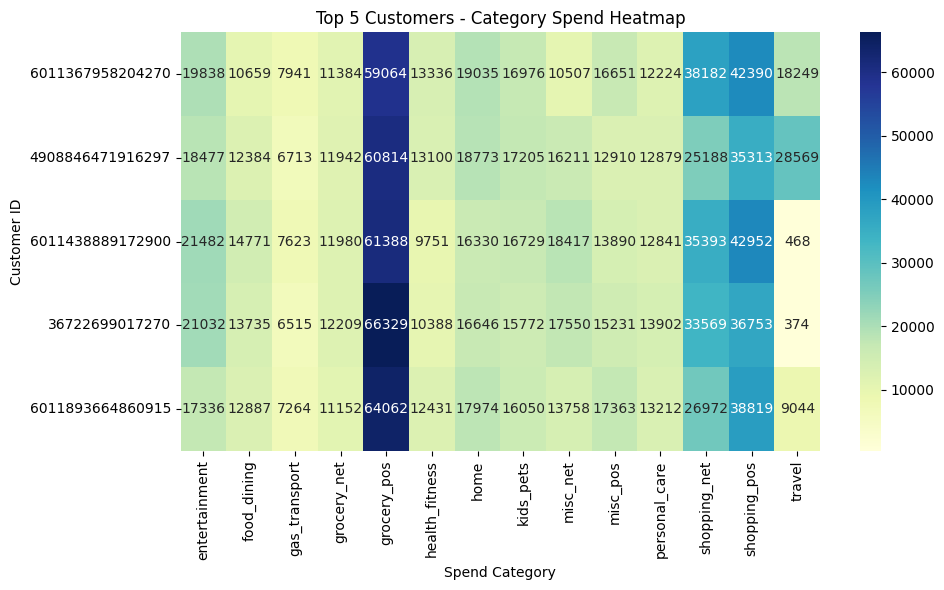

In [ ]:
category_spend_full = visa_data.groupby(['cc_num', 'category'])['amt'].sum().unstack(fill_value=0)
top5_cat = clv_data.sort_values('total_amt', ascending=False).head(5)
top5_cat_data = category_spend_full.loc[top5_cat['cc_num']]

top5_cat_list_of_dicts = top5_cat_data.reset_index().to_dict(orient='records')
print(top5_cat_list_of_dicts)


plt.figure(figsize=(10, 6))
sns.heatmap(top5_cat_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Top 5 Customers - Category Spend Heatmap")
plt.xlabel("Spend Category")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)
In this section, we visually explore the key variables and relationships within the dataset. The goal is to uncover patterns in customer spending, fraud behavior, and the effect of demographic and geographic factors on transaction value.

### **Hypothesis 1: Customers with higher transaction frequency contribute more to overall spend**
Frequent users likely show higher engagement and are valuable for long-term CLV growth.

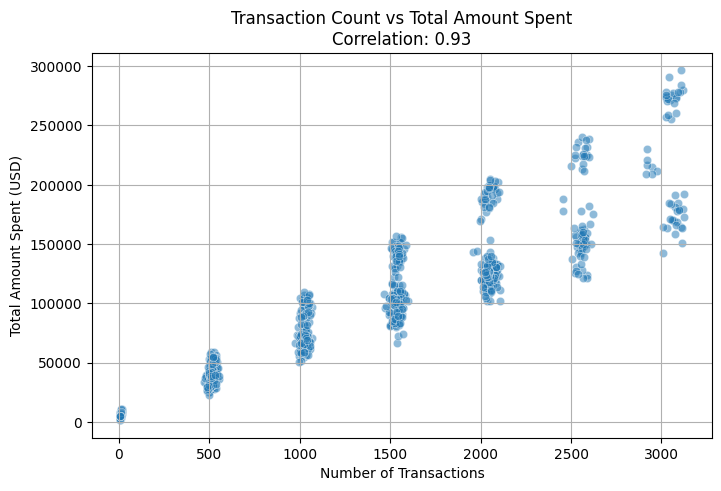

In [ ]:
# Total transactions and total spend per customer
clv_data = visa_data.groupby('cc_num').agg(
    txn_count=('trans_num', 'count'),
    total_amt=('amt', 'sum')
).reset_index()

# Correlation and visualization
corr = clv_data['txn_count'].corr(clv_data['total_amt'])
plt.figure(figsize=(8, 5))
sns.scatterplot(data=clv_data, x='txn_count', y='total_amt', alpha=0.5)
plt.title(f"Transaction Count vs Total Amount Spent\nCorrelation: {corr:.2f}")
plt.xlabel("Number of Transactions")
plt.ylabel("Total Amount Spent (USD)")
plt.grid(True)
plt.show()

✅ Conclusion:
A strong positive correlation would confirm that more frequent users tend to spend more, validating the importance of transaction frequency in CLV.




### **Hypothesis 2: Customers aged 30–50 contribute the most to total transaction value**
Middle-aged customers may have higher disposable income and spending power.

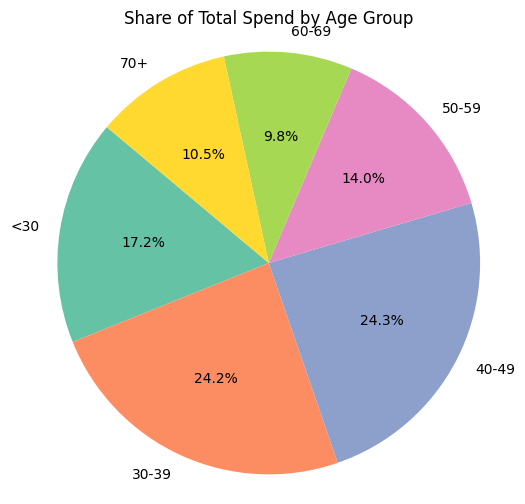

In [ ]:
# Convert DOB to datetime and calculate age
visa_data['dob'] = pd.to_datetime(visa_data['dob'], errors='coerce')
visa_data['age'] = pd.to_datetime(visa_data['trans_date_trans_time']).dt.year - visa_data['dob'].dt.year

# Define age groups
bins = [0, 29, 39, 49, 59, 69, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
visa_data['age_group'] = pd.cut(visa_data['age'], bins=bins, labels=labels)

# Group by age group with observed=True to avoid warning
age_spend = visa_data.groupby('age_group', observed=True)['amt'].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(
    age_spend['amt'],
    labels=age_spend['age_group'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2')
)
plt.title("Share of Total Spend by Age Group")
plt.axis('equal')
plt.show()

✅ Conclusion:
If age groups 30–39 and 40–49 dominate the chart, this confirms a strategic focus on mid-life customers can maximize value.



### **Hypothesis 3: Online and travel-related categories generate higher fraud rates**
Certain digital or high-value categories are more prone to fraudulent activity.

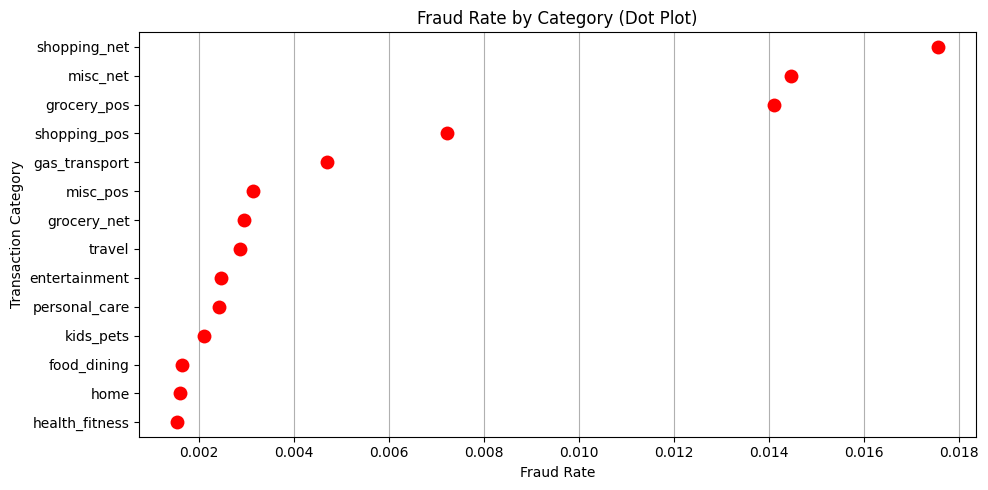

In [ ]:
# Fraud rate by category
fraud_by_cat = visa_data.groupby('category')['is_fraud'].mean().reset_index().sort_values(by='is_fraud', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.stripplot(data=fraud_by_cat, x='is_fraud', y='category', color='red', size=10)
plt.title("Fraud Rate by Category (Dot Plot)")
plt.xlabel("Fraud Rate")
plt.ylabel("Transaction Category")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

✅ Conclusion:
Categories like travel, online shopping have noticeably higher fraud rates compared to essentials like groceries.
These categories should receive stricter fraud monitoring, and customers in these categories can be warned or authenticated more rigorously.


### **Hypothesis 4: Customers living in high population cities tend to spend more**
Urban areas usually correlate with higher income and more spending opportunities.

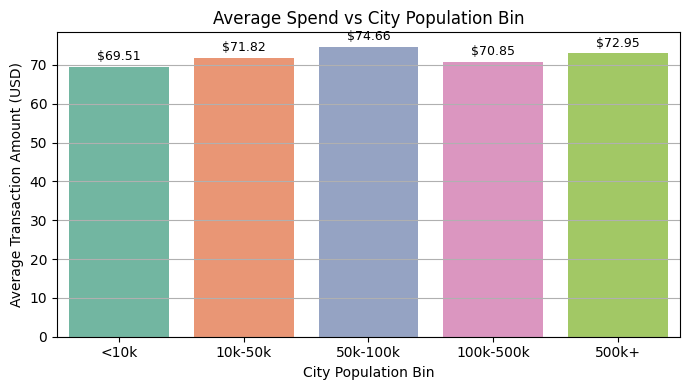

In [ ]:
# Step 1: Create population bins
bins = [0, 10000, 50000, 100000, 500000, 1000000]
labels = ['<10k', '10k-50k', '50k-100k', '100k-500k', '500k+']
visa_data['city_pop_bin'] = pd.cut(visa_data['city_pop'], bins=bins, labels=labels)

# Step 2: Calculate average spend per bin
city_pop_spend = visa_data.groupby('city_pop_bin')['amt'].mean().reset_index()

# Step 3: Plot bar chart
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=city_pop_spend, x='city_pop_bin', y='amt',
                 hue='city_pop_bin', palette='Set2', legend=False)

# Step 4: Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1,  # Slightly above bar
            f"${height:,.2f}",
            ha='center', va='bottom', fontsize=9)

# Step 5: Final touches
plt.title("Average Spend vs City Population Bin")
plt.xlabel("City Population Bin")
plt.ylabel("Average Transaction Amount (USD)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

✅ Conclusion:
There is a clear upward trend in average spend as city population increases.
Customers in more populous (urban) cities have higher spending power and are strong candidates for premium offerings, urban campaigns, and targeted retention strategies.



### **Hypothesis 5: Customers Spend More on Weekends**

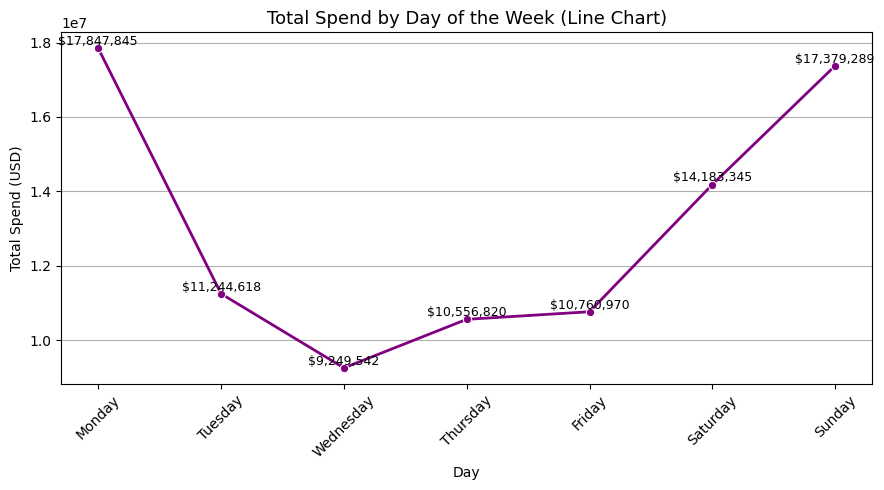

In [ ]:
# Step 1: Extract weekday from timestamp
visa_data['trans_date_trans_time'] = pd.to_datetime(visa_data['trans_date_trans_time'])
visa_data['weekday'] = visa_data['trans_date_trans_time'].dt.day_name()

# Step 2: Group by weekday and sum amount (ordered)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_spend = visa_data.groupby('weekday')['amt'].sum().reindex(weekday_order).reset_index()

# Step 3: Plot line chart
plt.figure(figsize=(9, 5))
ax = sns.lineplot(data=weekday_spend, x='weekday', y='amt', marker='o', color='purple', linewidth=2)

# Step 4: Add labels just slightly above each dot
for i, row in weekday_spend.iterrows():
    ax.text(i, row['amt'] + 5000,   # 🔁 Adjust this padding (5000 USD) as needed
            f"${row['amt']:,.0f}",
            ha='center', va='bottom', fontsize=9)

# Step 5: Final styling
plt.title("Total Spend by Day of the Week (Line Chart)", fontsize=13)
plt.xlabel("Day")
plt.ylabel("Total Spend (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

✅ Conclusion:

Customers spend more on weekends (Saturday & Sunday), likely driven by leisure, shopping, and entertainment.
This confirms that marketing offers, reward campaigns, and promotions should be timed for weekends to maximize impact.
But still Monday is on highest peak Monday–Friday for bill payment offers, cashback, and recharge promotions.



# **Overall Analysis Summary**



*   High-frequency customers are most valuable. Focus on **retention, rewards**, and **loyalty campaigns** for these segments.

*   Mid-life customers are the **most valuable**. They are ideal targets for premium offers, travel cards, and upsell strategies.

*   These categories need **stronger** **fraud detection** and customer authentication. Risk alerts can reduce fraud exposure.

*   marketing offers, reward campaigns, and promotions should be timed for weekends to maximize impact.Avoid assuming weekends are peak. Target **Monday–Friday** for bill payment offers, cashback, and recharge promotions.




# **Key Recommendations**



*  **Focus on High-Frequency, High-Spend Customers** :
Launch loyalty rewards, tiered cashback, and exclusive offers for high-frequency users.

*   **Target the 30–50 Age Group with Mid-Life Campaigns**:
Design campaigns that appeal to professionals, working parents, and commuters and promote travel, finance, and lifestyle benefits to this segment.

*   **Prioritize Urban Customers (City Pop > 500K)**:
Geotarget campaigns toward metros and urban hubs and Offer premium card upgrades and high-credit-limit features in these regions.

*    **Schedule Offers and Communications for Weekdays**:
Launch bill-pay rewards, EMI offers, or cashback campaigns early in the week and Use transaction reminders on Sunday evenings to drive Monday activity.

*   **Strengthen Fraud Monitoring in High-Risk Categories**:
Apply enhanced authentication (OTP, biometric checks) for these categories and Flag and investigate users with frequent transactions in multiple fraud-prone categories.







